# Recommender System Through Spotify

### Machine Learning Algorithms Applied: PCA and KNN

Files to be installed:

pip install spotipy

pip install openpyxl

pip install plotly

pip install chart_studio

The implementation through the Spotipy Web API needs a unique client_id and client_secret IDs that can be found for free by creating a developer spotify account on the link below:
https://developer.spotify.com/documentation/web-api/quick-start/


In [1]:
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
%matplotlib inline

In [2]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

In [3]:
# Need to follow the link on the reference and create a free developer account on spotify for the unique keys below
client_id = "63df85c40aa44705981b267e8cb6569c"         #private
client_secret = "3d9288b698f34250bcefcb217e8c38a6"     #private

# Set up query with credentials
sp = spotipy.Spotify(
            client_credentials_manager=SpotifyClientCredentials(
            client_id=client_id,
            client_secret=client_secret))

url_pop = 'spotify:playlist:37i9dQZF1DXcBWIGoYBM5M'
url_rnb = 'spotify:playlist:37i9dQZF1DX0XUsuxWHRQd'

In [4]:
track = 'Levels' #input("Enter a song name:")
artist = 'Avicii' #input("Enter the artist:")

In [5]:
def find_song(track, artist):
    
    song_data = defaultdict()
    results = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    
    if results['tracks']['items'] == []:
        return None
 
    track_result = results['tracks']['items'][0]
    
    track_id = track_result['id']
    name = track_result['name']
    artist = track_result['artists'][0]['name']
    album = track_result["album"]["name"]
    
    audio_features = sp.audio_features(track_id)[0]
    for key, value in audio_features.items():
        song_data[key] = value

    df_user = pd.DataFrame({"Song Name": [name], "Artist": artist, "Album": album, "ID": track_id})
    df_user_song = pd.DataFrame({"Danceability": [(song_data["danceability"])],
                                 "Mode": (song_data["mode"]),
                                 "Energy": (song_data["energy"]),
                                 "Key": (song_data["key"]),
                                 "Loudness": (song_data["loudness"]),
                                 "Speechiness": (song_data["speechiness"]),
                                 "Acousticness": (song_data["acousticness"]),
                                 "Instrumentalness": (song_data["instrumentalness"]),
                                 "Liveness": (song_data["liveness"]),
                                 "Valence": (song_data["valence"]),
                                 "Tempo": (song_data["tempo"]),
                                 "Duration (ms)": (song_data["duration_ms"]),
                                 "ID_CHECK": (song_data["id"]),
                                })   
    
    df_combined = df_user_song.join(df_user)
    
    return df_combined

In [6]:
song_stuff = find_song(track,artist)
song_stuff

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms),ID_CHECK,Song Name,Artist,Album,ID
0,0.584,0,0.889,1,-5.941,0.0343,0.0462,0.828,0.309,0.464,126.04,199907,5UqCQaDshqbIk3pkhy4Pjg,Levels - Radio Edit,Avicii,Levels,5UqCQaDshqbIk3pkhy4Pjg


In [9]:
def analyse_playlist(url, count):
    """Retrieves all songs from an identified playlist, and takes the ID, song, album, artist 
    and puts this all into a DataFrame"""

   # SONG NAMES

    offset = 0
    name = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.name,total'])

        name.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    name_list = [b["track"]["name"] for a in name for b in a]
    len(name_list)

    # ALBUM

    offset=0
    album = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.album.name,total'])

        album.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    album_list = [b["track"]["album"]["name"] for a in album for b in a]
    
   # ARTIST

    offset=0
    artist = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.album.artists.name,total'])

        artist.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    artist_list = [b["track"]["album"]["artists"][0]["name"] for a in artist for b in a]

    
    # ID
    
    offset = 0
    identifier = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.id,total'])

        identifier.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    identifier_list= [b["track"]["id"] for a in identifier for b in a]
    len(identifier_list)

    #Get audio features
    features = [sp.audio_features(identifier) for identifier in identifier_list]
    
    # Get each invidividual feature
    danceability = [(b["danceability"]) for a in features for b in a]    
    mode = [(b["mode"]) for a in features for b in a]
    energy = [(b["energy"]) for a in features for b in a]
    key = [(b["key"]) for a in features for b in a]        
    loudness = [(b["loudness"]) for a in features for b in a]       
    speechiness = [(b["speechiness"]) for a in features for b in a]
    acousticness = [(b["acousticness"]) for a in features for b in a]        
    instrumentalness = [(b["instrumentalness"]) for a in features for b in a] 
    liveness = [(b["liveness"]) for a in features for b in a]
    valence = [(b["valence"]) for a in features for b in a]        
    tempo = [(b["tempo"]) for a in features for b in a] 
    duration_ms = [(b["duration_ms"]) for a in features for b in a] 
    identifier_ = [(b["id"]) for a in features for b in a] 
    
    ## DataFrame (saved with current time)

    df = pd.DataFrame({"Song Name": name_list, "Artist": artist_list, "Album": album_list, "ID": identifier_list})
    df_2 = pd.DataFrame({"Danceability":danceability,
                         "Mode":mode,
                         "Energy":energy,
                         "Key":key,
                         "Loudness":loudness,
                         "Speechiness":speechiness,
                         "Acousticness":acousticness,
                         "Instrumentalness":instrumentalness,
                         "Liveness":liveness,
                         "Valence":valence,
                         "Tempo":tempo,
                         "Duration (ms)": duration_ms,
                         "ID_CHECK":identifier_
                               })

    df_combined = df_2.join(df)
    df_combined.to_excel("file" + str(count) + ".xlsx")
    
    # this adds user chosen song to the end
    df_combined = pd.concat([df_combined, song_stuff], ignore_index=True)

#     df_combined = df_combined.append(song_stuff)
    df_combined.to_excel("newfile" + str(count) + ".xlsx")

    return df_combined.tail()

In [10]:
analyse_playlist(url_pop, "pop")

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms),ID_CHECK,Song Name,Artist,Album,ID
46,0.664,1,0.405,1,-7.413,0.0800,0.8770,0.000765,0.110,0.743,81.890,169573,1Ukxccao1BlWrPhYkcXbwZ,From The Start,Laufey,From The Start,1Ukxccao1BlWrPhYkcXbwZ
47,0.551,1,0.550,10,-5.339,0.0286,0.7770,0.000000,0.202,0.342,101.190,176440,1Y3LN4zO1Edc2EluIoSPJN,Until I Found You (with Em Beihold) - Em Beiho...,Stephen Sanchez,Until I Found You (Em Beihold Version),1Y3LN4zO1Edc2EluIoSPJN
48,0.571,1,0.458,4,-9.283,0.0258,0.5440,0.000093,0.123,0.299,132.025,242485,5LrN7yUQAzvthd4QujgPFr,Here With Me,d4vd,Petals to Thorns,5LrN7yUQAzvthd4QujgPFr
49,0.517,1,0.675,6,-5.382,0.0357,0.4590,0.000000,0.151,0.518,203.853,163855,59uQI0PADDKeE6UZDTJEe8,Last Night,Morgan Wallen,3 Songs At A Time Sampler,59uQI0PADDKeE6UZDTJEe8
50,0.584,0,0.889,1,-5.941,0.0343,0.0462,0.828000,0.309,0.464,126.040,199907,5UqCQaDshqbIk3pkhy4Pjg,Levels - Radio Edit,Avicii,Levels,5UqCQaDshqbIk3pkhy4Pjg


In [11]:
analyse_playlist(url_rnb, "rnb")

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms),ID_CHECK,Song Name,Artist,Album,ID
47,0.904,1,0.461,8,-4.349,0.1640,0.01180,0.000000,0.1070,0.0794,148.045,148611,23L1gQJjtlZMrZPZvluyQe,Presidential Rolex,Key Glock,Presidential Rolex,23L1gQJjtlZMrZPZvluyQe
48,0.613,0,0.583,1,-10.042,0.1590,0.02640,0.003380,0.1380,0.2490,159.997,204069,7jVMNHk15YGRHRXYFoCXK8,From The Hood,King Von,Grandson,7jVMNHk15YGRHRXYFoCXK8
49,0.672,1,0.538,2,-6.569,0.1030,0.00998,0.000461,0.4410,0.0663,134.838,164743,4NQfLaqLd1Fms4UTkkTj7J,TESLA,Lil Yachty,TESLA,4NQfLaqLd1Fms4UTkkTj7J
50,0.577,1,0.658,2,-8.281,0.0961,0.10700,0.000000,0.0953,0.2430,83.297,153129,1c926G7no7KCvt717X6rgZ,Call Your Friends,Rod Wave,Call Your Friends,1c926G7no7KCvt717X6rgZ
51,0.584,0,0.889,1,-5.941,0.0343,0.04620,0.828000,0.3090,0.4640,126.040,199907,5UqCQaDshqbIk3pkhy4Pjg,Levels - Radio Edit,Avicii,Levels,5UqCQaDshqbIk3pkhy4Pjg


## Data Visualization

### Histograms

In [12]:
def plot_figures(excel_file, colour):
    """Takes data from an excel file and plots histogram in subplots"""

    # Read excel file and put into DataFrame

    df = pd.read_excel(excel_file, index_col=0)

    # Initiate plot
    
    plt.figure(1,figsize=(30,25))
    
    # Create subplots for each column in the excel file

    plt.subplot(4,3,1)
    sns.distplot(df["Danceability"], color=colour)

    plt.subplot(4,3,2)
    sns.distplot(df["Energy"], color=colour)

    plt.subplot(4,3,3)
    sns.distplot(df["Tempo"], color=colour)

    plt.subplot(4,3,4)
    sns.distplot(df["Loudness"], color=colour)

    plt.subplot(4,3,5)
    sns.distplot(df["Speechiness"], color=colour)

    plt.subplot(4,3,6)
    sns.distplot(df["Acousticness"], color=colour)

    plt.subplot(4,3,7)
    sns.distplot(df["Instrumentalness"], color=colour)

    plt.subplot(4,3,8)
    sns.distplot(df["Liveness"], color=colour)

    plt.subplot(4,3,9)
    sns.distplot(df["Valence"], color=colour)

    plt.subplot(4,3,10)
    sns.distplot(df["Duration (ms)"], color=colour)

    plt.subplot(4,3,11)
    sns.distplot(df["Key"], color=colour)

    plt.subplot(4,3,12)
    sns.distplot(df["Mode"], color=colour)



C:\Users\hseit\AppData\Local\Temp\ipykernel_43204\930726913.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Danceability"], color=colour)
C:\Users\hseit\AppData\Local\Temp\ipykernel_43204\930726913.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Energy"], color=colour)
C:\Users

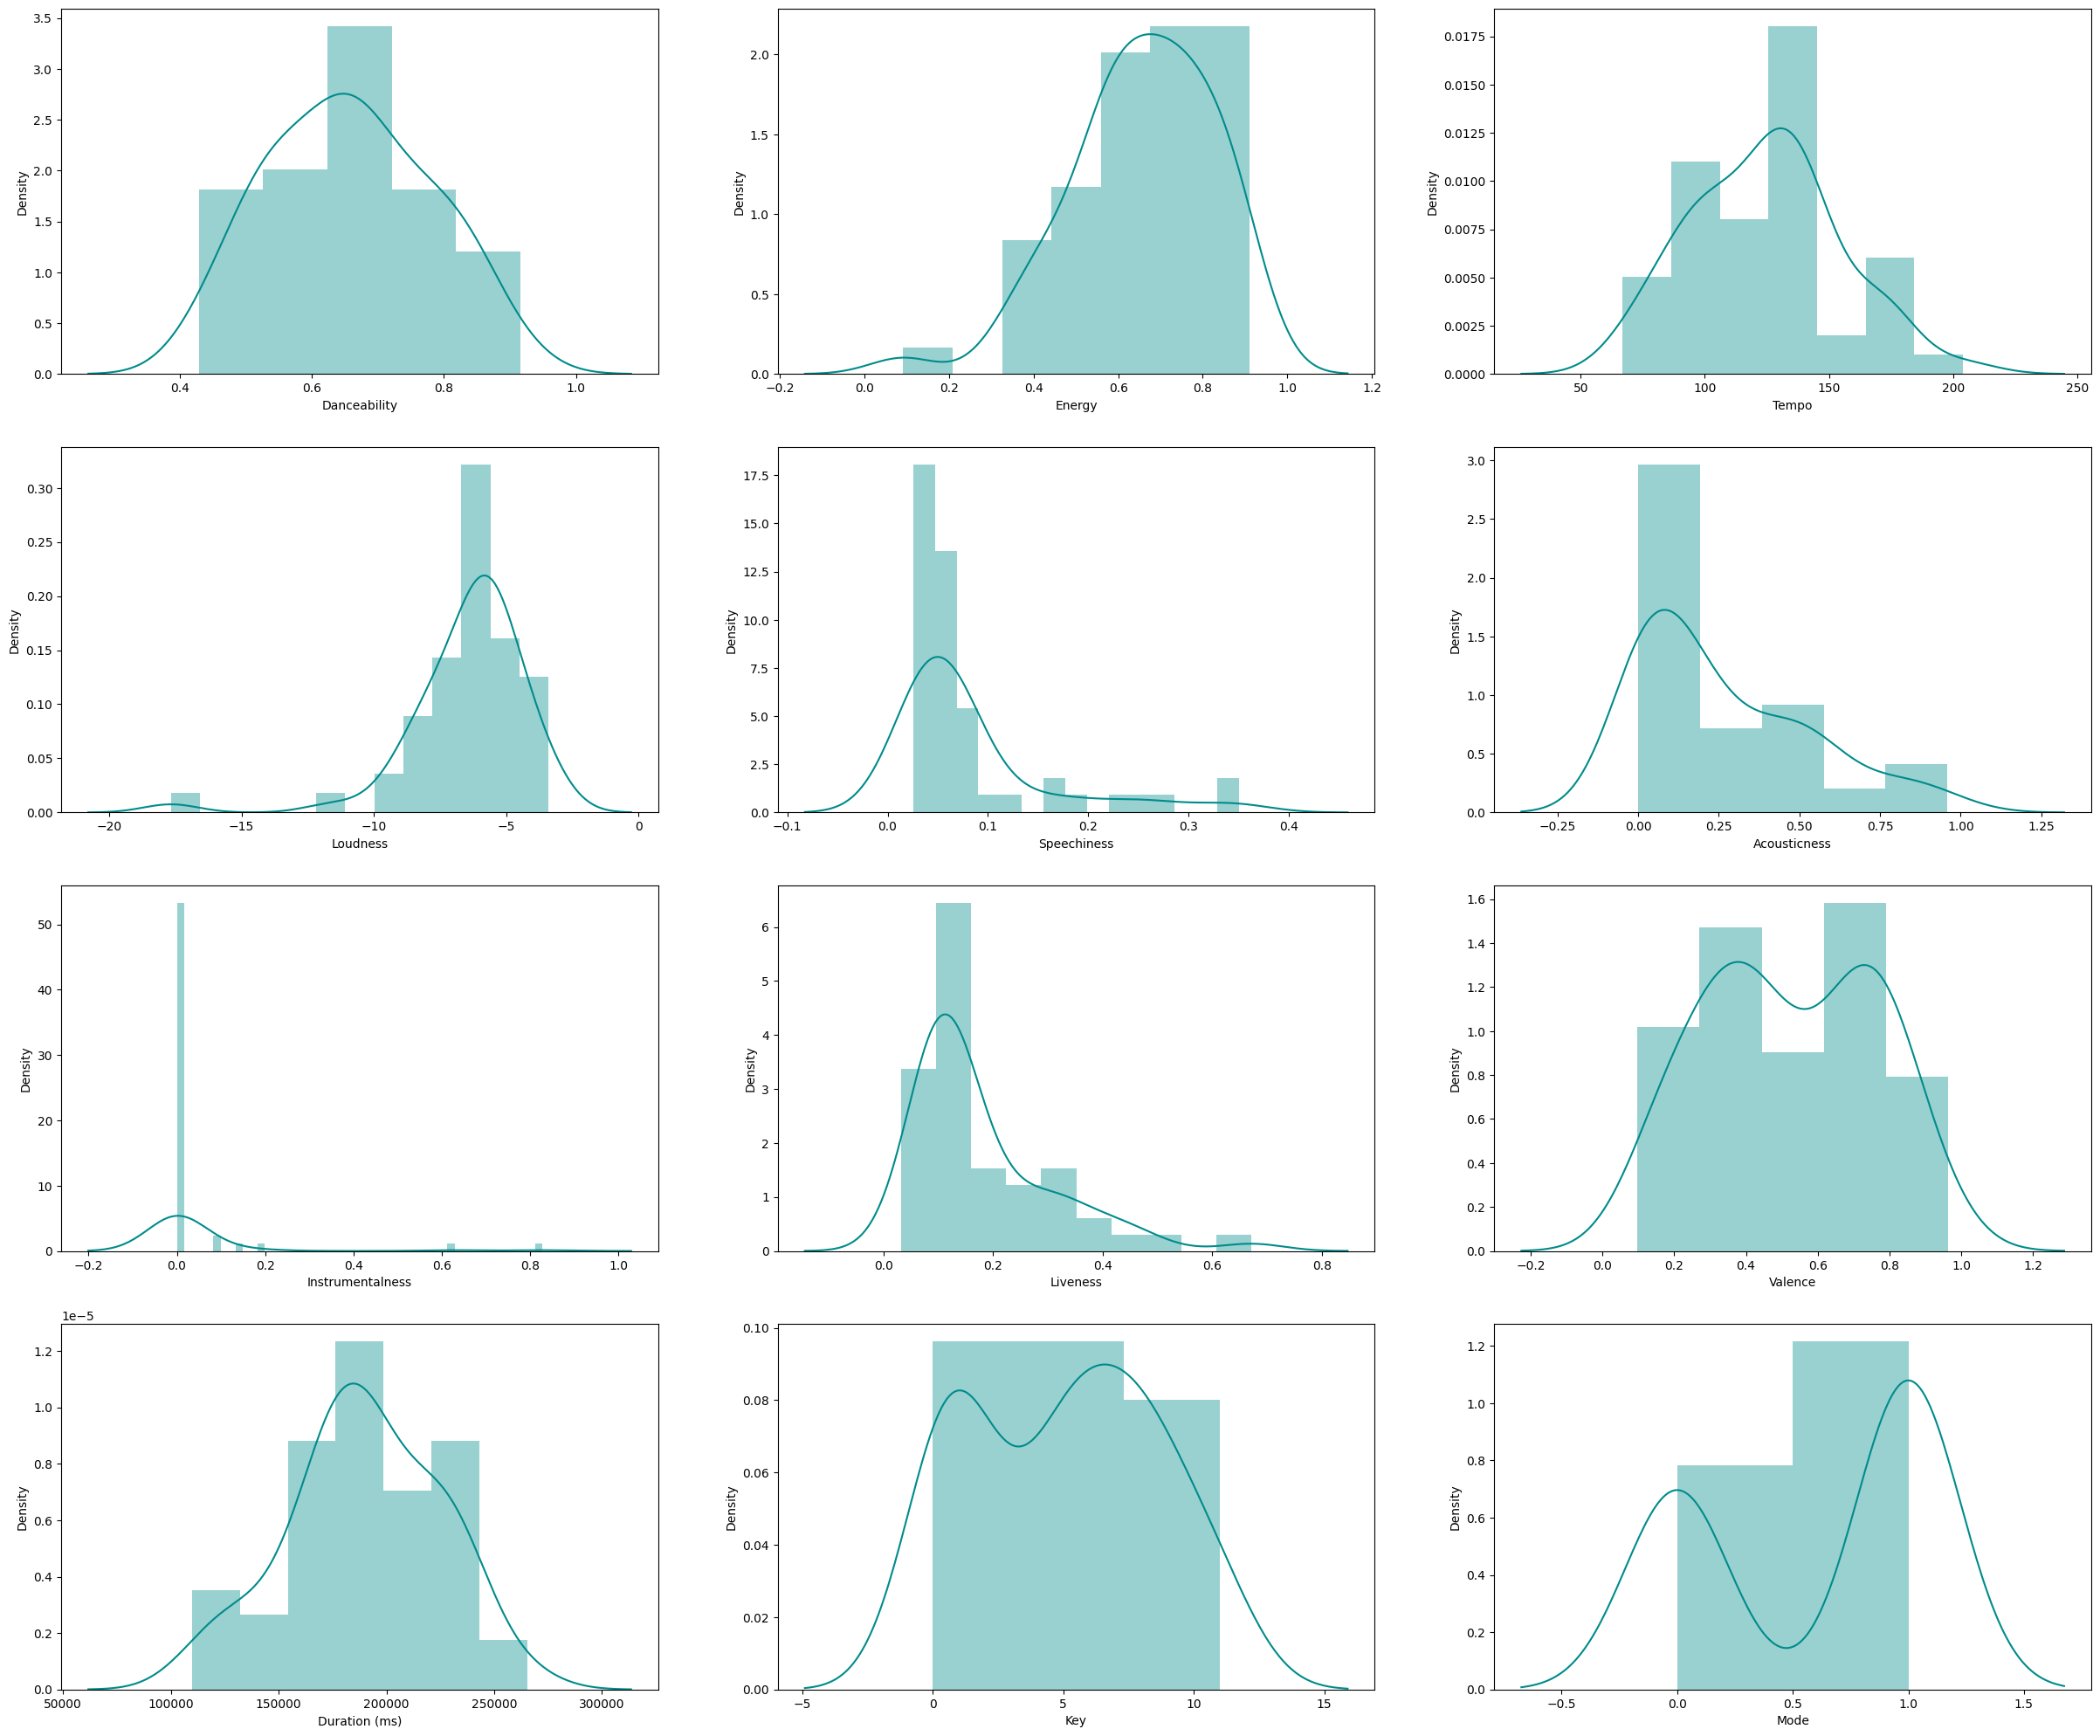

In [13]:
plot_figures("newfilepop.xlsx", colour="darkcyan")

C:\Users\hseit\AppData\Local\Temp\ipykernel_43204\930726913.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Danceability"], color=colour)
C:\Users\hseit\AppData\Local\Temp\ipykernel_43204\930726913.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Energy"], color=colour)
C:\Users

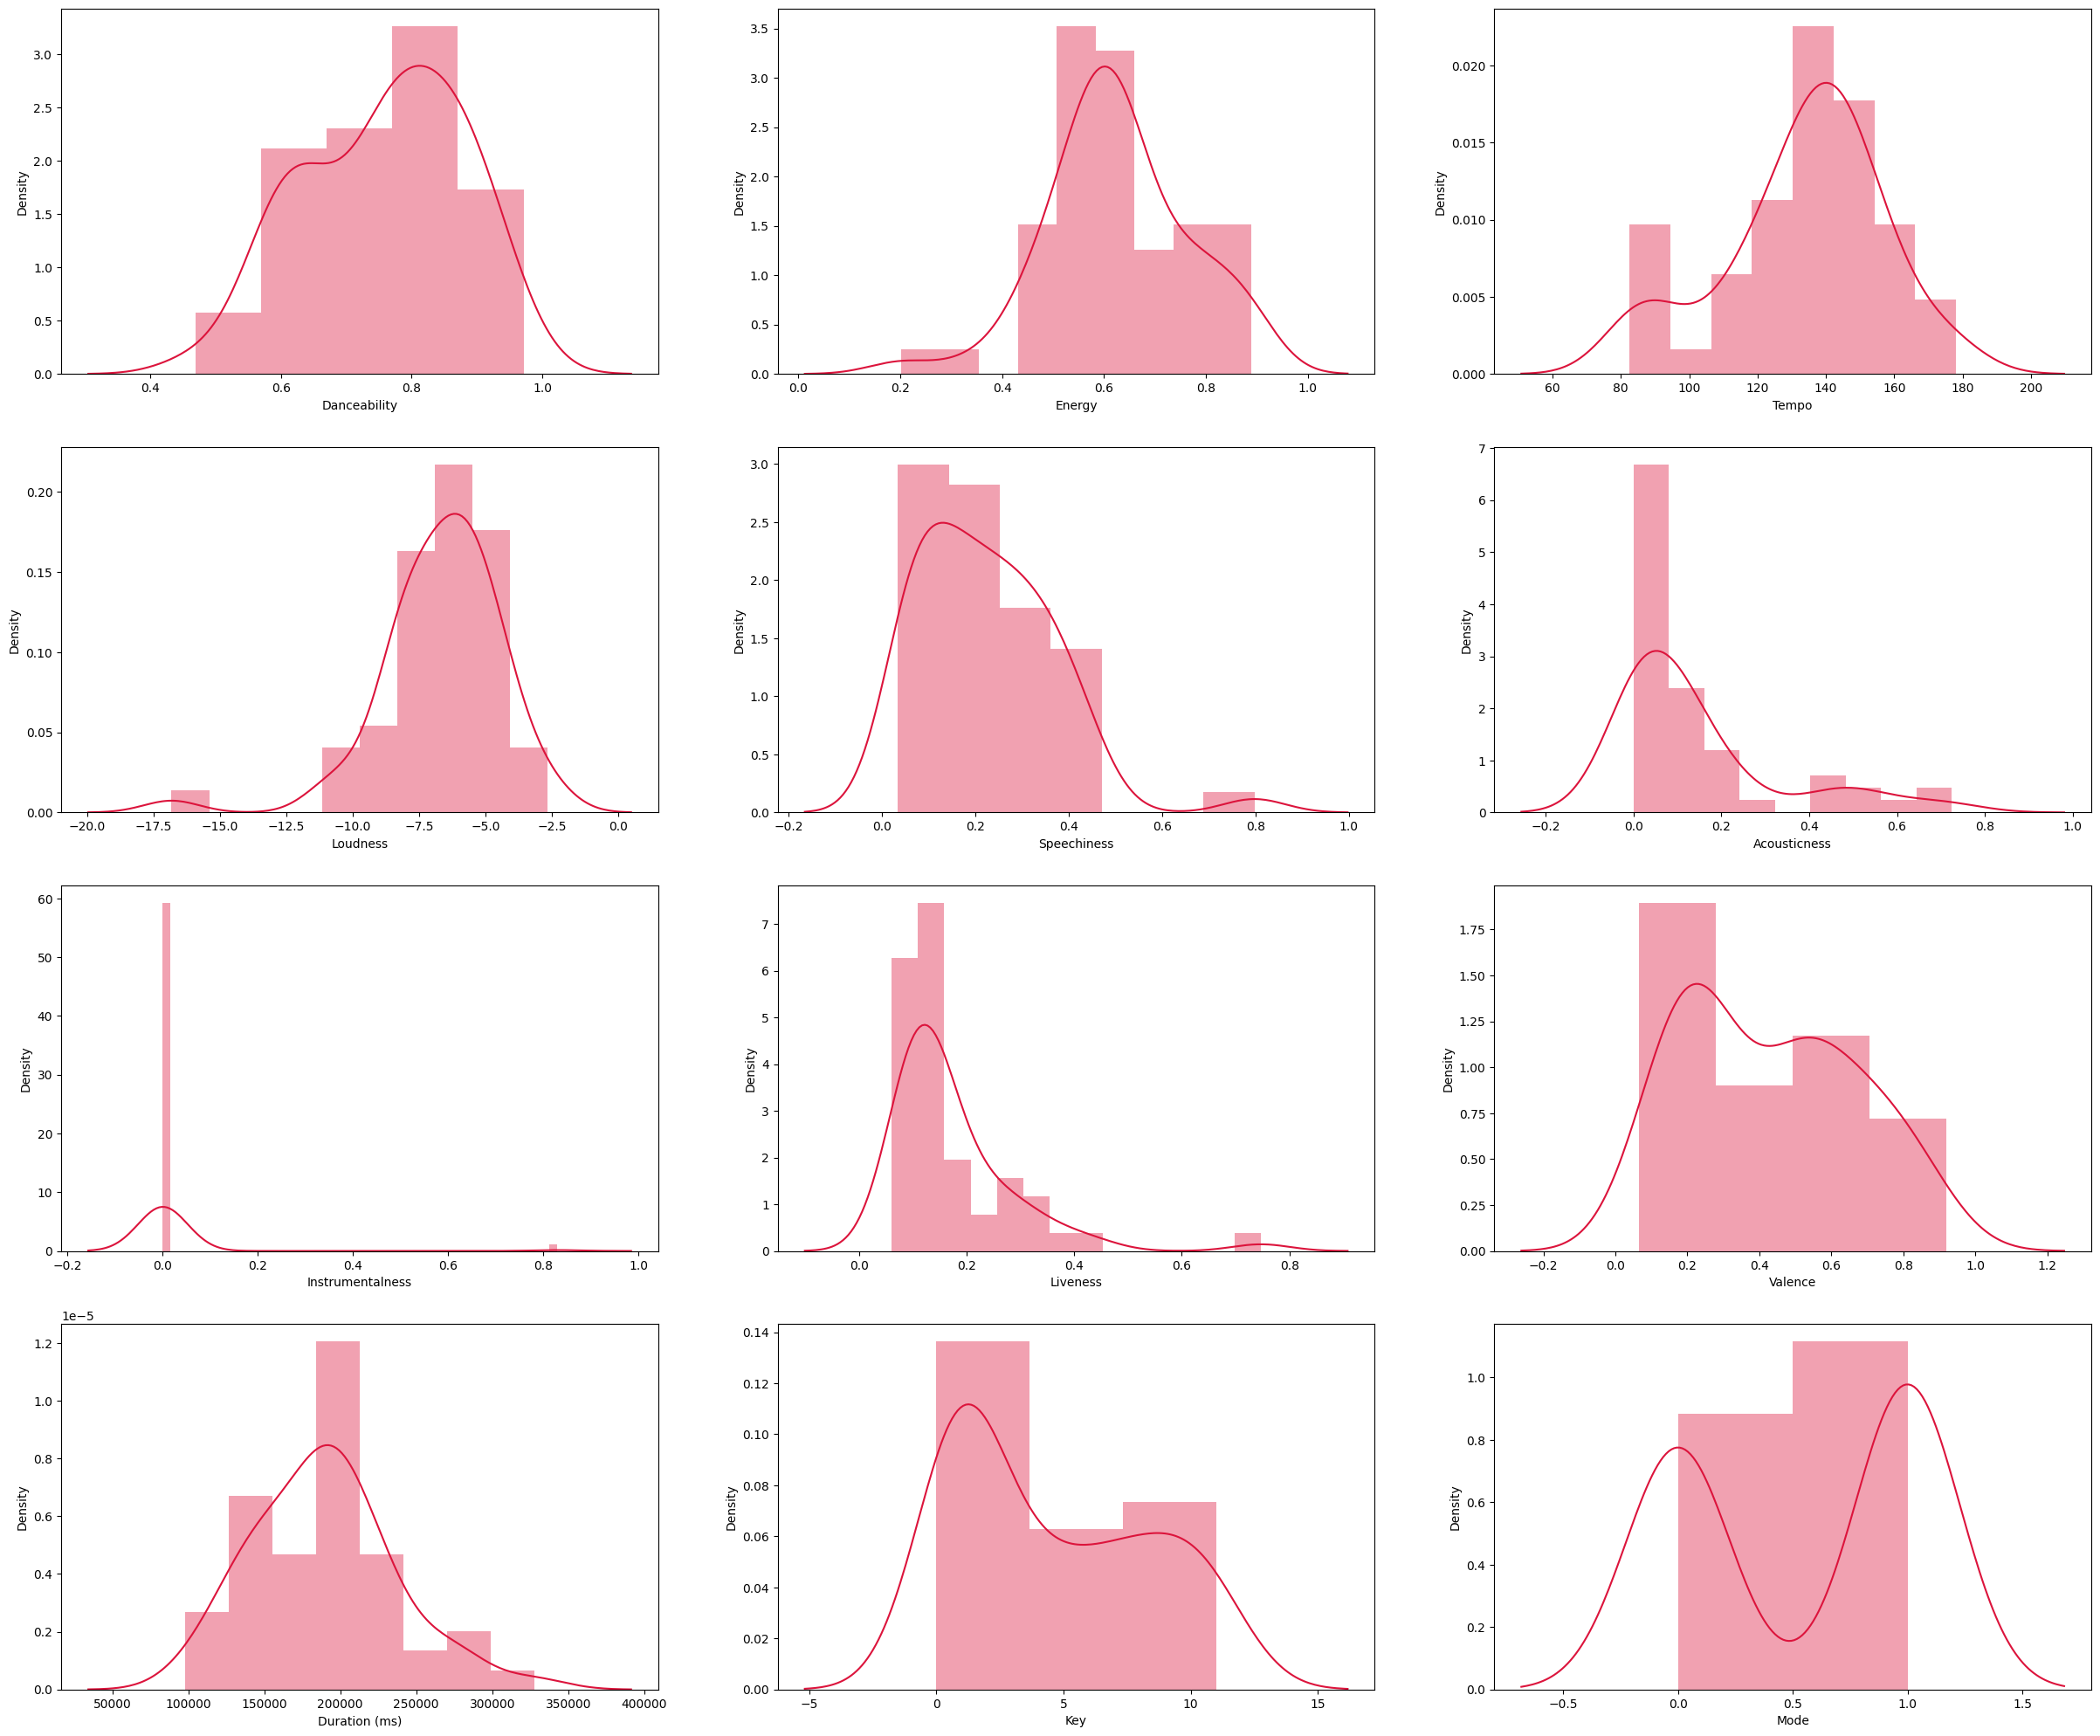

In [14]:
plot_figures("newfilernb.xlsx",colour="crimson")

### Radar Charts

In [15]:
def plot_radar_chart(excel_file):
    """Takes data from excel file and scales the values so that they all lie between zero and 1.
    Then plots a radar chart."""

    df = pd.read_excel(excel_file, index_col = 0)
    #or df = pd.read_excel(excel_file)
    
    # Get the specific columns
    radar = df.loc[:,"Danceability":"Duration (ms)"]

    # Create another df for our altered values (scale all values between 0 and 1)
    df_z = radar
    df_z["Key"] = (df["Key"] / df["Key"].max())
    df_z["Duration (ms)"] = (df["Duration (ms)"] / df["Duration (ms)"].max())
    df_z["Tempo"] = (df["Tempo"] / df["Tempo"].max())
    df_z["Loudness"] = (df["Loudness"] / df["Loudness"].min())

    # Prepare data for plotting with plotly.express
    labels = list(df_z.columns)

    values = df_z.mean().values

    df_radar = pd.DataFrame(dict(r=values, theta=labels))

    fig = px.line_polar(df_radar, r="r", theta="theta", line_close=True)

    fig.update_traces(fill="toself")
    fig.show()
    return df_radar

In [24]:
pop_radar = plot_radar_chart("newfilepop.xlsx")

In [17]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [18]:
rnb_radar = plot_radar_chart("newfilernb.xlsx")

In [19]:
# PCA Decomposition
def PCA(excel_file):

    from sklearn.decomposition import PCA

    df = pd.read_excel(excel_file, index_col=0)

    df_scaled = pd.DataFrame()

    for col in df.loc[:,"Danceability":"Duration (ms)"]:
        df_scaled[col] = (df[col] - df[col].mean() / df[col].std())

    df_scaled


    # Initialize PCA
    pca = PCA(n_components = len(df_scaled.columns))

    # Fit PCA
    pca_series = pca.fit_transform(df_scaled).T

    df_pca = pd.DataFrame({"PC1":pca_series[0], "PC2":pca_series[1]})
    print(df_pca)
    df_pca.to_excel("DF_PCA_" + f'{excel_file}')

    explained_variance = pca.explained_variance_ratio_

    print("\n explained variance = {}".format(explained_variance))

    eigenvector_loadings = pca.singular_values_
    print("\n eigenvector_loadings = {}".format(eigenvector_loadings))



In [20]:
PCA("newfilepop.xlsx")

             PC1        PC2
0  -42072.711642 -11.007347
1    -783.698541  22.787830
2   11250.308216  41.898057
3   18022.286879 -25.396075
4   13098.288752 -18.556129
5    4250.294050  -0.748343
6    4893.295636   3.990438
7  -32692.719167 -35.865085
8  -25789.712768 -17.250208
9  -41867.701929  19.041478
10  35010.300493  14.066100
11  79927.296248  -6.444391
12   5664.308500  43.477293
13 -37518.719079 -34.891137
14 -49640.708959  -1.345625
15  -6975.700562  17.664364
16  64637.292510 -15.517946
17  35730.280759 -47.016605
18 -30046.700013  23.001390
19  -8242.715942 -29.920610
20 -10777.707404  -3.124734
21 -23276.702893  12.949873
22 -42026.697395  33.138571
23  22374.308915  42.181808
24  58664.293760 -10.570267
25 -31842.712800 -16.368291
26 -56456.706988   5.745876
27 -12122.699288  22.362513
28  16879.307888  39.937991
29   4886.293781  -1.677756
30   3677.286006 -25.691170
31   -147.690549  47.340732
32  49659.292644 -12.547846
33  15424.291821  -9.411425
34  71867.306333  26

In [21]:
PCA("newfilernb.xlsx")

              PC1        PC2
0   -64146.249713   7.528836
1     -316.250001   1.309482
2     2514.749007 -14.827881
3    42563.752087  30.553161
4    41649.750621   5.773619
5   -46446.250126   1.255511
6    86094.748581 -22.533787
7   -19774.250209  -1.374053
8     3540.749989   1.160465
9   138480.752551  35.202590
10  -16810.247123  43.992846
11   97392.747031 -49.004626
12  -14719.249882   0.028680
13   22395.750974  13.909885
14   -3853.250093  -2.353001
15   70360.752892  39.577026
16    1401.747593 -37.517936
17  -44796.249148  13.292149
18    7466.749650  -6.959261
19   56947.751332  17.669233
20  -62329.250379  -2.688338
21  -54471.250613  -6.096730
22   34017.749233 -11.964931
23    2813.751025  13.304695
24    -174.249095  13.401549
25    4146.749317 -10.833228
26  -24410.249802   1.116912
27   -3438.248647  22.147864
28   82926.749364 -14.077709
29  -35066.246692  53.003791
30   18649.751484  20.216971
31   14626.749115 -13.647088
32  -56186.249408  11.999969
33   37196.749

# Scatterplot

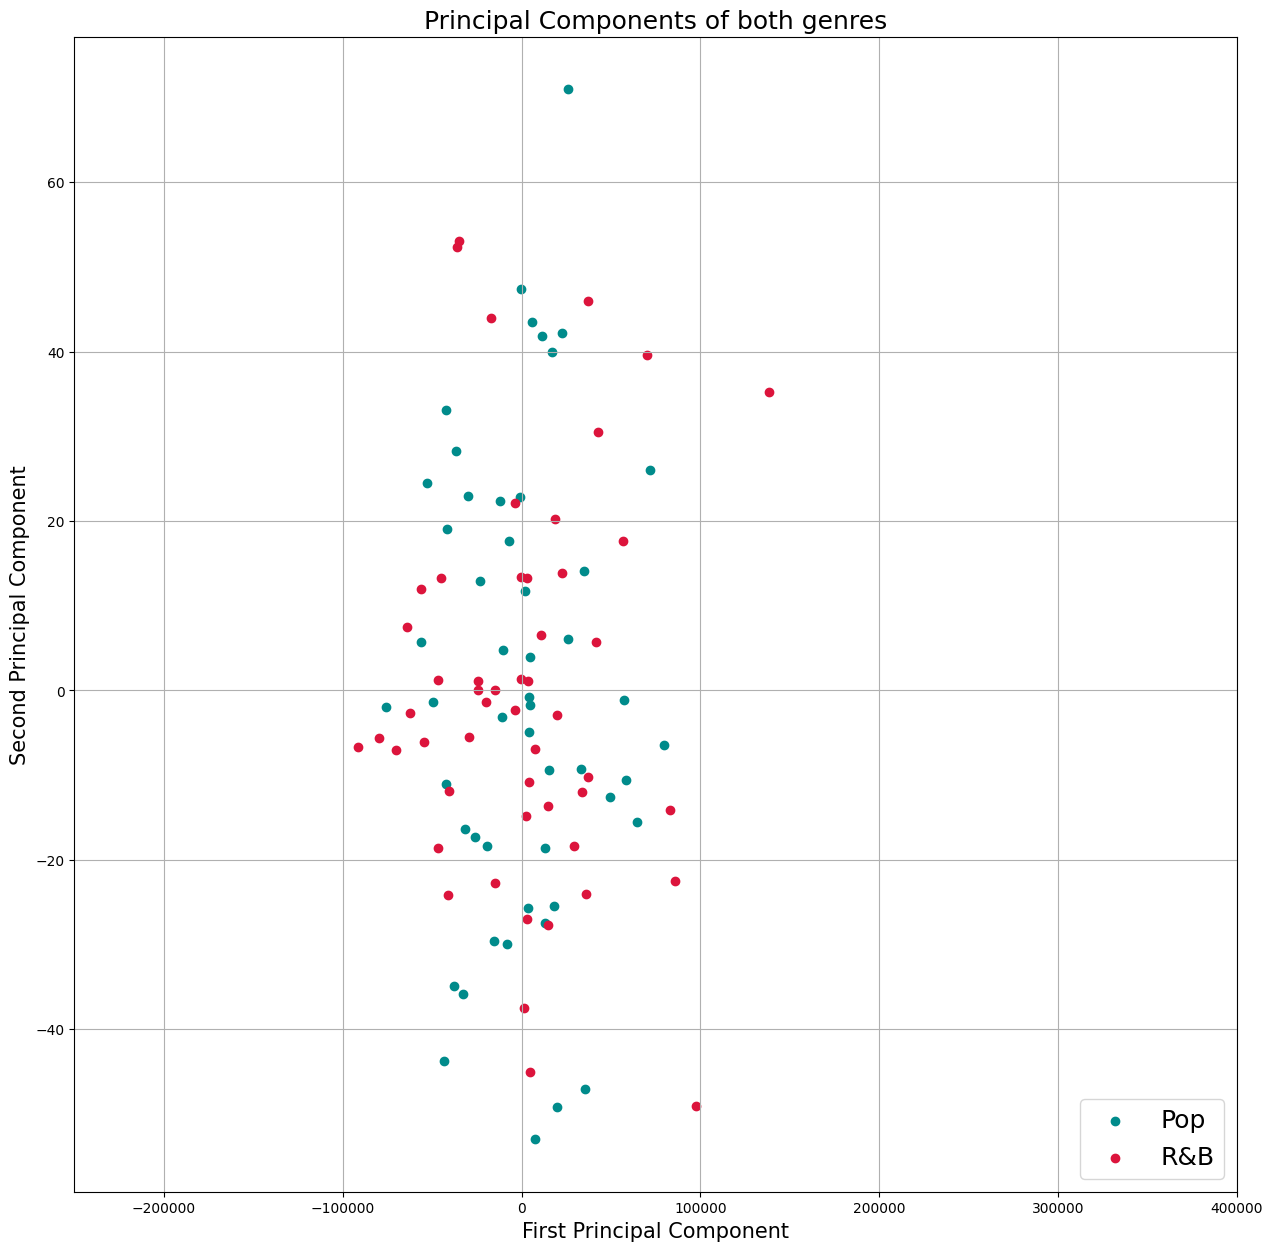

In [22]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

ax.set_xlabel("First Principal Component", fontsize=15)
ax.set_ylabel("Second Principal Component", fontsize=15)
ax.set_title("Principal Components of both genres", fontsize=18)

pop_components = pd.read_excel("DF_PCA_newfilepop.xlsx", index_col=0)
rnb_components = pd.read_excel("DF_PCA_newfilernb.xlsx", index_col=0)

ax = plt.scatter(x = pop_components["PC1"], y= pop_components["PC2"], label="Pop", color="darkcyan")
ax = plt.scatter(x = rnb_components["PC1"][:1861], y= rnb_components["PC2"][:1861], label="R&B", color="crimson")
plt.xlim(-250000,400000)

plt.grid(True)
plt.legend(prop = {"size":18}, loc="lower right")

# RECOMMENDATION

## Perform KNN algorithm

In [26]:
# Label the class of each genre, pop = 0, rnb = 1

#AK - insert 'new' at beginning of file name to include user choice in dataset - ex. "newfilepop.xlsx"
labelled_pop = pd.read_excel("filepop.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
labelled_rnb = pd.read_excel("filernb.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
labelled_pop["Class"] = 0
labelled_rnb["Class"] = 1

# Combine to create a full dataframe
full_data = pd.concat([labelled_pop, labelled_rnb[:200]], ignore_index=True)

# Scale between 0 and 1
full_data["Key"] = (full_data["Key"] / full_data["Key"].max())
full_data["Tempo"] = (full_data["Tempo"] / full_data["Tempo"].max())
full_data["Loudness"] = (full_data["Loudness"] / full_data["Loudness"].min())

full_data_random = full_data.sample(frac=1)
full_data_random

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Class
72,0.829,1,0.436,0.272727,0.464478,0.3270,0.150000,0.000000,0.0954,0.693,0.701638,1
74,0.745,0,0.877,0.454545,0.149958,0.1730,0.455000,0.000000,0.0732,0.852,0.588733,1
56,0.615,1,0.632,0.090909,0.483385,0.2920,0.108000,0.000000,0.1290,0.194,0.736442,1
3,0.610,1,0.571,0.181818,0.319785,0.0782,0.008630,0.000000,0.1310,0.747,0.515126,0
64,0.808,0,0.789,0.636364,0.332862,0.2360,0.051700,0.000000,0.0819,0.465,0.667196,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.470,1,0.495,0.636364,0.608322,0.2450,0.682000,0.000000,0.1010,0.193,0.837751,1
92,0.620,1,0.737,0.090909,0.334050,0.3540,0.055100,0.000000,0.7470,0.919,0.662036,1
25,0.715,0,0.620,0.090909,0.339938,0.0484,0.417000,0.000000,0.0822,0.172,0.480493,0
15,0.821,1,0.341,0.727273,0.334843,0.2810,0.000087,0.007460,0.1800,0.344,0.686205,0


### Training data

In [27]:
# Get x training data
x_train = full_data_random[:3000]

# Target values
y_train = x_train["Class"].values

# Remove target values from x_data
x_train = x_train.drop("Class", axis=1)
x_train

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
72,0.829,1,0.436,0.272727,0.464478,0.3270,0.150000,0.000000,0.0954,0.693,0.701638
74,0.745,0,0.877,0.454545,0.149958,0.1730,0.455000,0.000000,0.0732,0.852,0.588733
56,0.615,1,0.632,0.090909,0.483385,0.2920,0.108000,0.000000,0.1290,0.194,0.736442
3,0.610,1,0.571,0.181818,0.319785,0.0782,0.008630,0.000000,0.1310,0.747,0.515126
64,0.808,0,0.789,0.636364,0.332862,0.2360,0.051700,0.000000,0.0819,0.465,0.667196
...,...,...,...,...,...,...,...,...,...,...,...
66,0.470,1,0.495,0.636364,0.608322,0.2450,0.682000,0.000000,0.1010,0.193,0.837751
92,0.620,1,0.737,0.090909,0.334050,0.3540,0.055100,0.000000,0.7470,0.919,0.662036
25,0.715,0,0.620,0.090909,0.339938,0.0484,0.417000,0.000000,0.0822,0.172,0.480493
15,0.821,1,0.341,0.727273,0.334843,0.2810,0.000087,0.007460,0.1800,0.344,0.686205


### Test Data

In [28]:
x_test = full_data_random[70:]

# Randomise the data
x_test = x_test.sample(frac=1)

y_test = x_test["Class"].values

x_test = x_test.drop("Class", axis=1)
x_test

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
87,0.722,0,0.5790,0.000000,0.358845,0.1500,0.095200,0.000000,0.2610,0.5440,0.770168
16,0.847,0,0.6220,0.090909,0.381942,0.0903,0.119000,0.000000,0.2850,0.2200,0.637719
82,0.939,1,0.5210,0.090909,0.422757,0.3790,0.195000,0.000000,0.2010,0.5150,0.613162
84,0.761,0,0.7950,0.727273,0.304331,0.2990,0.725000,0.000000,0.2810,0.8450,0.711601
97,0.904,1,0.4610,0.727273,0.246193,0.1640,0.011800,0.000000,0.1070,0.0794,0.726234
23,0.520,0,0.7310,0.545455,0.302179,0.0557,0.342000,0.001010,0.3110,0.6620,0.853213
7,0.444,1,0.0911,0.000000,1.000000,0.0307,0.959000,0.000001,0.0980,0.1420,0.384606
61,0.752,1,0.6430,0.636364,0.314803,0.4580,0.142000,0.000000,0.0889,0.8050,0.863308
9,0.671,0,0.8760,0.636364,0.321596,0.0352,0.120000,0.188000,0.0823,0.9640,0.637705
53,0.868,1,0.5380,0.454545,0.487008,0.1740,0.269000,0.000003,0.0901,0.7320,0.490393


# TEST KNN VALUES

In [29]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [46]:
# # test knn values to show optimal accuracy
# def test_accuracy(x_train, x_test, y_train, y_test):
    
#     accuracy_scores = []
    
#     for i in range(2,10):
#         knn_i = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
#         y = knn_i.predict(x_test)
#         accuracy_scores.append((i,(metrics.accuracy_score(y_test, y))))
        
#     df_accuracy_scores = pd.DataFrame(accuracy_scores).rename(columns = {0:'KNN Value',1:'Accuracy Score'})
#     df_accuracy_scores = df_accuracy_scores.style.hide_index().set_properties(**{'text-align': 'center'})
#     df_accuracy_scores = df_accuracy_scores.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
    
#     return df_accuracy_scores

def test_accuracy(x_train, x_test, y_train, y_test):
    
    accuracy_scores = []
    
    for i in range(2,10):
        knn_i = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
        y = knn_i.predict(x_test)
        accuracy_scores.append((i, metrics.accuracy_score(y_test, y)))
        
    df_accuracy_scores = pd.DataFrame(accuracy_scores, columns=['KNN Value', 'Accuracy Score'])
    
    return df_accuracy_scores


In [47]:
accuracy_results = test_accuracy(x_train, x_test, y_train, y_test)
accuracy_results

,KNN Value,Accuracy Score
0,2,0.774194
1,3,0.741935
2,4,0.709677
3,5,0.677419
4,6,0.677419
5,7,0.612903
6,8,0.645161
7,9,0.580645


<Axes: xlabel='KNN Value'>

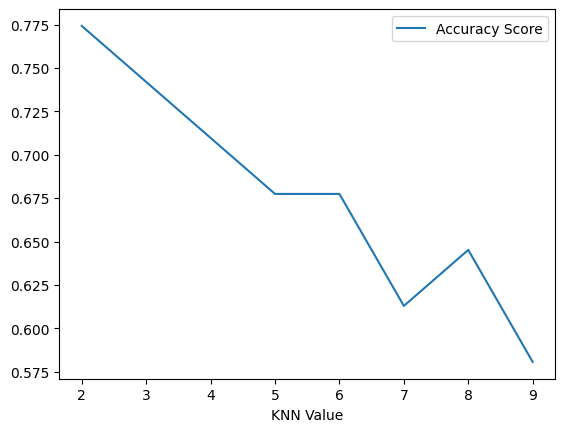

In [49]:
# accuracy_results = accuracy_results.data
accuracy_results.plot(x='KNN Value',y='Accuracy Score')

In [50]:
accuracy_results = accuracy_results.sort_values('Accuracy Score', ascending=False)
optimal_knn = accuracy_results['KNN Value'].iloc[0]

print(" The optimal KNN value is ", optimal_knn)

 The optimal KNN value is  2


### Fit the KNN model

In [51]:
knn = KNeighborsClassifier(n_neighbors=optimal_knn)

#cross_validate
cv_scores = cross_val_score(knn, x_train, y_train, cv=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

[0.63636364 0.7        0.5        0.6        0.8        0.8
 0.7        0.3        0.7        0.3       ] 

mean = 0.60


In [53]:
predictions = knn.predict(x_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [54]:
accuracy_score = knn.score(x_test, y_test)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

Accuracy score = 0.77


In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[19,  0],
       [ 7,  5]], dtype=int64)

In [56]:
# song_prediction_data
song_pred_data = song_stuff.iloc[:, 0:11]
song_pred_data

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.584,0,0.889,1,-5.941,0.0343,0.0462,0.828,0.309,0.464,126.04


In [57]:
song_pred_data["Key"] = (song_pred_data["Key"] / full_data["Key"].max())
song_pred_data["Tempo"] = (song_pred_data["Tempo"] / full_data["Tempo"].max())
song_pred_data["Loudness"] = (song_pred_data["Loudness"] / full_data["Loudness"].min())
song_pred_data

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.584,0,0.889,1.0,-39.61788,0.0343,0.0462,0.828,0.309,0.464,126.04


In [58]:
user_prediction = knn.predict(song_pred_data)

if user_prediction == 0:
    print(" The chosen song is closest to pop.")
    user_genre = 0
else:
    print(" The chosen song is closest to RnB.")
    user_genre = 1

 The chosen song is closest to pop.


In [73]:
# 0 = pop, 1 = rnb --- used for automatic recommendation route if we decide to do that
if user_genre == 0:
    og_excel_file = "filepop.xlsx"
    pl_components = pop_components
else:
    og_excel_file = "filernb.xlsx"
    pl_components = rnb_components

In [78]:
# # ("filepop.xlsx" or "filernb.xlsx", pop_components or rnb_components, rec_amount)
# def recommendation(original_excel_file, playlist_components, rec_amount):
    
#     distances = []
#     for i in range(len(playlist_components)-1):
#         distances.append(math.dist(playlist_components.iloc[50],playlist_components.iloc[i]))
        
#     rec_data = ['Song Name', 'Artist', 'Album']  
    
#     distance_df = pd.DataFrame(distances)    
    
#     playlist_info = pd.read_excel(original_excel_file, index_col=None, usecols=rec_data)
#     playlist_info_df = pd.DataFrame(playlist_info)
    
#     comb_df = playlist_info_df.join(distance_df)
#     comb_df = comb_df.rename(columns = {0:'Distance'})
    
    
#     recommendations = comb_df.sort_values('Distance').head(rec_amount)[rec_data].style.set_properties(**{'text-align': 'left'})
#     recommendations = recommendations.hide_index()
#     recommendations = recommendations.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
    
#     return recommendations
# ("filepop.xlsx" or "filernb.xlsx", pop_components or rnb_components, rec_amount)
def recommendation(original_excel_file, playlist_components, rec_amount):
    
    distances = []
    for i in range(len(playlist_components)-1):
        distances.append(math.dist(playlist_components.iloc[50], playlist_components.iloc[i]))
        
    rec_data = ['Song Name', 'Artist', 'Album']  
    
    distance_df = pd.DataFrame(distances)    
    
    playlist_info = pd.read_excel(original_excel_file, index_col=None, usecols=rec_data)
    playlist_info_df = pd.DataFrame(playlist_info)
    
    comb_df = playlist_info_df.join(distance_df)
    comb_df = comb_df.rename(columns = {0:'Distance'})
    
    recommendations = comb_df.sort_values('Distance').head(rec_amount).reset_index()[rec_data].style.set_properties(**{'text-align': 'left'})
    recommendations = recommendations.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
    
    return recommendations


In [79]:
# manual pop - Levels by Avicii
recommendation("filepop.xlsx", pop_components, 5)

,Song Name,Artist,Album
0,Flowers,Miley Cyrus,Endless Summer Vacation
1,Snooze,SZA,SOS
2,LALA,Myke Towers,LA VIDA ES UNA
3,Demons,Doja Cat,Demons
4,Karma,Taylor Swift,Midnights


In [80]:
# manual rnb - Levels by Avicii
recommendation("filernb.xlsx", rnb_components, 5)

,Song Name,Artist,Album
0,Call Your Friends,Rod Wave,Call Your Friends
1,SkeeYee,Sexyy Red,Hood Hottest Princess
2,Presidential Rolex,Key Glock,Presidential Rolex
3,Bluffin (feat. Lil Baby),Gucci Mane,Bluffin (feat. Lil Baby)
4,Booty Drop,Doechii,Booty Drop


In [81]:
# automatic based on user_genre prediction
recommendation(og_excel_file, pl_components, 5)

,Song Name,Artist,Album
0,Flowers,Miley Cyrus,Endless Summer Vacation
1,Snooze,SZA,SOS
2,LALA,Myke Towers,LA VIDA ES UNA
3,Demons,Doja Cat,Demons
4,Karma,Taylor Swift,Midnights


# Reference:

    https://towardsdatascience.com/using-k-nearest-neighbours-to-predict-the-genre-of-spotify-tracks-796bbbad619f
   
    https://developer.spotify.com/documentation/web-api/quick-start/